In [1]:
!pip install noisets
import numpy as np
from noisets import noisettes as ns

import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)

In [2]:
# Syncronising the local drive folder with colab
# The folder containing the data that we shared with you must be 
# linked to your personal google Drive (right click -> Add shortcut to Drive)
# After running the cell allow the notebook to accede to your Drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_folder_b = '/content/drive/MyDrive/COVID_noiset/data/beta/'

In [4]:
# Load data 
path = data_folder_b
filename1 = 'MP_45_F1_short.txt' # sample for individual M at day 45 of the study
filename2 = 'MP_15_F1_short.txt' # sample for individual M at day 15 of the study
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

# check 
MP_contraction = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , MP_contraction.filename1)
print("Second Filename is : ",  MP_contraction.filename2)
print("Name of the columns of first file are : ", MP_contraction.colnames1)
print("Name of the columns of second file are : ", MP_contraction.colnames2)

First Filename is :  MP_45_F1_short.txt
Second Filename is :  MP_15_F1_short.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']


Create the data-frame

In [5]:
n, df_contraction = MP_contraction.import_data()

/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:99: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mergedFrame.drop(newnames[3]+suffixes[1], 1,inplace=True) #removes duplicates


In [8]:
df_contraction

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.046930,4.600179e-02,106262.0,89845.0,TGTGCCAGCAGCGCCCCAGCGGGGGTCGGCGAGCAGTACTTC,CASSAPAGVGEQYF
1,0.039028,3.961802e-02,88368.0,77377.0,TGTGCCAGCAGCCCAAGGGCAGGGAAGGGTGAGCAGTTCTTC,CASSPRAGKGEQFF
2,0.020447,2.154908e-02,46296.0,42087.0,TGTGCCAGCAGCCCGCCGGGACAGCACAATGAGCAGTTCTTC,CASSPPGQHNEQFF
3,0.019505,2.572711e-02,44165.0,50247.0,TGTGCCAGCAGTTTTTGGACACCCTACGAGCAGTACTTC,CASSFWTPYEQYF
4,0.013851,1.603727e-02,31363.0,31322.0,TGTGCCAGCAGCTTGGAAGGGTACGGGACGCCGGCTGAAGCTTTCTTT,CASSLEGYGTPAEAFF
...,...,...,...,...,...,...
1199118,0.000000,5.120128e-07,0.0,1.0,TGTGCCAGCGGC,CASG
1199119,0.000000,5.120128e-07,0.0,1.0,TGTGCCAGCACC,CAST
1199120,0.000000,5.120128e-07,0.0,1.0,TGTACCCTGGGC,CTLG
1199121,0.000000,5.120128e-07,0.0,1.0,TGTAGACTCTTC,CRLF


(2.5e-07, 0.1, 2.5e-07, 0.1)

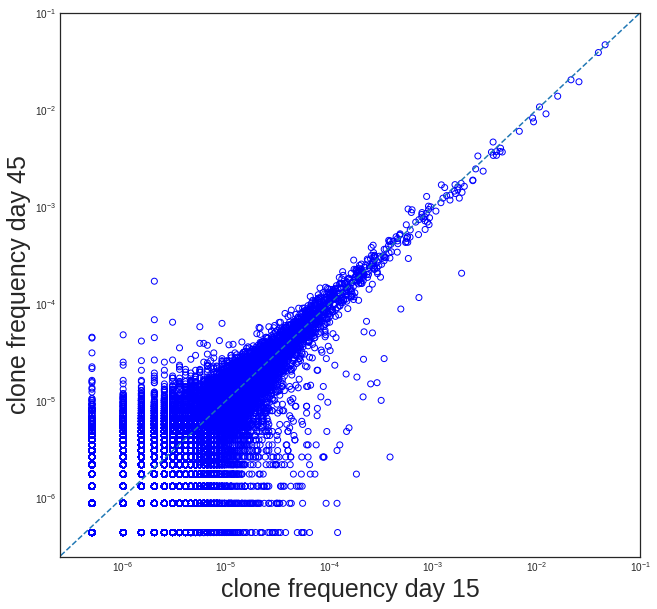

In [10]:
plt.figure(figsize=(10.4,10))
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-white')
plt.scatter(df_contraction['Clone_fraction_2'], df_contraction['Clone_fraction_1'], c='none', edgecolor='blue')
plt.plot(X,X, linestyle ='--')
plt.xlabel(r'clone frequency day 15', fontsize = 25)
plt.ylabel(r'clone frequency day 45', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])


##Expansion

In [12]:
paras_1 = [-2.05458585,   0.44229634,   1.09391748, -10.19919861] #parameters for the noise model for time 45 individual M
paras_2 =  [-2.05458585,   0.44229634,   1.09391748, -10.19919861] #parameters for the noise model for time 15 individual M

noise_model = 1 # Negative Binomial Sampling Noise Model
expansion = ns.Expansion_Model()

In [ ]:
# 2 thresholds to set for the detection
pval_threshold = 0.05  #Parameters to play with
smed_threshold = 0 #Parameters to play with

outpath = 'testexpansion_M_contraction' # name of the file Chose what you want 

expansion.expansion_table(outpath, paras_1, paras_2, df_contraction, noise_model, pval_threshold, smed_threshold)

/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:520: RuntimeWarning: divide by zero encountered in true_divide
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:520: RuntimeWarning: invalid value encountered in log
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:622: RuntimeWarning: divide by zero encountered in log
  return np.log(Pn_f)


N_obs: 1199123
Calculation Surface : 



In [ ]:
table_expansion = pd.read_csv('testexpansion_M_contraction.csv', sep = '\t')
table_expansion

#Explain the different statistics displayed in the table

In [ ]:
plt.figure(figsize=(10,10))

plt.style.use('seaborn-white')
plt.scatter(df_contraction['Clone_fraction_2'], df_contraction['Clone_fraction_1'], c='none', alpha = 0.8, edgecolor='blue')
plt.scatter(table_expansion['$f_2$'], table_expansion['$f_1$'], c='none', edgecolor= 'red')

plt.xlabel(r'clone frequency day 15 after COVID infection $', fontsize=20)
plt.ylabel(r'clone frequency day 45 after COVID infection $', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])